# Identifying Animals with NASNetMobile CNN

##### Importing libraries

In [12]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, \
            Input, MaxPooling2D, Reshape, ZeroPadding2D, \
            BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
import glob2
import cv2
from time import time
import PIL; from PIL import Image, ImageOps
import os
os.chdir(r'C:\Users\Nicolas\Documents\Scraping\animals')

In [13]:
print('Pillow Version:', PIL.__version__)
print('PIL Version:', PIL.VERSION)

Pillow Version: 5.2.0
PIL Version: 1.1.7


##### Importing images of the train set

Initializing empty lists

In [14]:
butterfly, cat, chicken, cow, dog, elephant, \
            horse, sheep, spider, squirrel = [], [], [], [], [], [], [], [], [], []

Creating a list of lists

In [15]:
categories = [butterfly, cat, chicken, cow, dog, elephant, \
            horse, sheep, spider, squirrel]

Listing the categories as strings

In [16]:
str_categories = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', \
            'horse', 'sheep', 'spider', 'squirrel']

In [17]:
'''ix, ix_files = 0, 0

for item in categories:
    files = glob2.glob('{}/*.*g'.format(str_categories[ix]))
    ix += 1
    for file in files: 
        ix_files += 1        
        if ix_files%5_000 == 0:
            print('%i images uploaded.'%(ix_files))
        item.append(file)
        
total_len = sum(len(cat) for cat in categories)
            
if ix_files > total_len-20:
        print()
        print('%i images successfully uploaded.'%(total_len))
        
print(); print('\n'.join(['Length of category <{}> is {}'.format(str_categories[i], 
                                len(categories[i])) for i in range(6)]))'''

"ix, ix_files = 0, 0\n\nfor item in categories:\n    files = glob2.glob('{}/*.*g'.format(str_categories[ix]))\n    ix += 1\n    for file in files: \n        ix_files += 1        \n        if ix_files%5_000 == 0:\n            print('%i images uploaded.'%(ix_files))\n        item.append(file)\n        \ntotal_len = sum(len(cat) for cat in categories)\n            \nif ix_files > total_len-20:\n        print()\n        print('%i images successfully uploaded.'%(total_len))\n        \nprint(); print('\n'.join(['Length of category <{}> is {}'.format(str_categories[i], \n                                len(categories[i])) for i in range(6)]))"

Example:

In [18]:
'''np.random.seed(42)
fig = plt.figure(figsize=(12, 12))
for i in range(1, 5):
    plt.subplot(1, 5, i)
    rand = np.random.randint(0, 10)
    ax = plt.imshow(plt.imread(categories[rand][np.random.randint(len(categories[rand]))]))
    plt.title('<{}>'.format(str_categories[rand].capitalize()))
    yticks = plt.xticks([])
    yticks = plt.yticks([])'''

"np.random.seed(42)\nfig = plt.figure(figsize=(12, 12))\nfor i in range(1, 5):\n    plt.subplot(1, 5, i)\n    rand = np.random.randint(0, 10)\n    ax = plt.imshow(plt.imread(categories[rand][np.random.randint(len(categories[rand]))]))\n    plt.title('<{}>'.format(str_categories[rand].capitalize()))\n    yticks = plt.xticks([])\n    yticks = plt.yticks([])"

We will resize to 150x150

In [19]:
'''ix = 0
start_timer = time()
for item in categories:
    for elem in item:
        image=Image.open(elem)
        ix+=1
        if ix%2_000==0:
            print(str(ix), 'images iterated for resizing')
        if image.size[0]/image.size[1] < 1.5:
            if image.size[1]/image.size[0] < 1.5:
                img=image.resize((224, 224)).save('resized/{}'.format(os.path.splitext(elem)[0] + '.png'))
stop_timer = time()
print(); print(str(round(stop_timer-start_timer)), 'seconds')'''

"ix = 0\nstart_timer = time()\nfor item in categories:\n    for elem in item:\n        image=Image.open(elem)\n        ix+=1\n        if ix%2_000==0:\n            print(str(ix), 'images iterated for resizing')\n        if image.size[0]/image.size[1] < 1.5:\n            if image.size[1]/image.size[0] < 1.5:\n                img=image.resize((224, 224)).save('resized/{}'.format(os.path.splitext(elem)[0] + '.png'))\nstop_timer = time()\nprint(); print(str(round(stop_timer-start_timer)), 'seconds')"

Reinitializing empty lists

In [20]:
butterfly, cat, chicken, cow, dog, elephant, \
            horse, sheep, spider, squirrel = [], [], [], [], [], [], [], [], [], []

Re-creating list of lists:

In [21]:
categories = [butterfly, cat, chicken, cow, dog, elephant, \
            horse, sheep, spider, squirrel]

Resized images:

In [22]:
ix, ix_files = 0, 0

for item in categories:
    files = glob2.glob('resized/{}/*.*g'.format(str_categories[ix]))  
    ix += 1
    for file in files[:2_00]: 
        ix_files += 1        
        if ix_files%3_000 == 0:
            print('%i images uploaded.'%(ix_files))
        if plt.imread(file).shape == (224, 224, 3): # don't forget to change shape!
            item.append(file) # item

total_len = sum(len(cat) for cat in categories)
            
if ix_files > total_len-20:
        print()
        print('%i images successfully uploaded.'%(total_len))
        
print(); print('\n'.join(['Length of category <{}> is {}'.format(str_categories[i], 
                                len(categories[i])) for i in range(10)]))


1960 images successfully uploaded.

Length of category <butterfly> is 171
Length of category <cat> is 200
Length of category <chicken> is 200
Length of category <cow> is 200
Length of category <dog> is 200
Length of category <elephant> is 194
Length of category <horse> is 200
Length of category <sheep> is 200
Length of category <spider> is 195
Length of category <squirrel> is 200


Resized images:

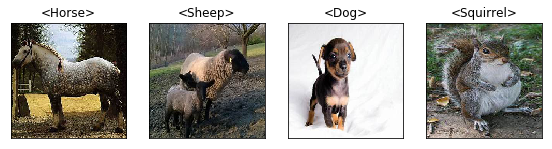

In [23]:
np.random.seed(42)
fig = plt.figure(figsize=(12, 12))
for i in range(1, 5):
    plt.subplot(1, 5, i)
    rand = np.random.randint(10)
    ax = plt.imshow(plt.imread(categories[rand][np.random.randint(len(categories[rand]))]))
    plt.title('<{}>'.format(str_categories[rand].capitalize()))
    yticks = plt.xticks([])
    yticks = plt.yticks([])

Taking a random image to test if the cropping worked:

In [24]:
Image.open(categories[4][np.random.randint(len(categories[4]))]).size

(224, 224)

##### Transforming the images into arrays

In [25]:
X = []
y = []

Predictor variables

In [26]:
start_timer = time()
for item in categories:
    for elem in item:
        X.append(plt.imread(elem))
stop_timer = time()
print(str(round(stop_timer-start_timer)), 'seconds')

9 seconds


In [27]:
for i in range(10):
    globals()['{}_target'.format(str_categories[i])] = [str_categories[i] for x in range(len(categories[i]))]

Target variable

In [28]:
y = np.concatenate([butterfly_target, cat_target, chicken_target, 
                    cow_target, dog_target, elephant_target, \
                    horse_target, sheep_target, spider_target, 
                    squirrel_target])

In [29]:
y[:10]

array(['butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly',
       'butterfly', 'butterfly', 'butterfly', 'butterfly', 'butterfly'],
      dtype='<U9')

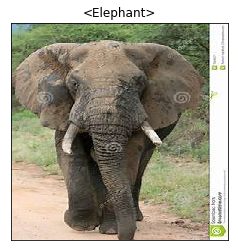

In [32]:
np.random.seed(4)
num = np.random.randint(len(X))
fig = plt.figure(figsize=(4, 4))
rand = np.random.randint(6)
ax = plt.imshow(X[num].reshape(224, 224, 3))
plt.title('<{}>'.format(y[num].capitalize()))  
yticks = plt.xticks([])
yticks = plt.yticks([])

##### Scaling the data

In [74]:
start_timer = time()
X = np.array(X, dtype=np.float32).reshape(-1, 224, 224, 3) # just change dit
'''X = np.divide(X, 255)
stop_timer = time()
print(str(round((stop_timer-start_timer)/60)), 'minutes')'''

"X = np.divide(X, 255)\nstop_timer = time()\nprint(str(round((stop_timer-start_timer)/60)), 'minutes')"

In [75]:
X[0][25][:10]

array([[0.68603516, 0.63916016, 0.30200195],
       [0.68603516, 0.63916016, 0.30200195],
       [0.6821289 , 0.6430664 , 0.29418945],
       [0.6821289 , 0.6430664 , 0.29418945],
       [0.6821289 , 0.6430664 , 0.29418945],
       [0.67822266, 0.63916016, 0.2902832 ],
       [0.6821289 , 0.64697266, 0.2902832 ],
       [0.6821289 , 0.64697266, 0.2902832 ],
       [0.6821289 , 0.64697266, 0.2902832 ],
       [0.6821289 , 0.64697266, 0.2824707 ]], dtype=float32)

In [76]:
X.shape

(1960, 224, 224, 3)

##### Reshaping the data

Getting shape info

In [77]:
num_labels = 10
img_cols = X.shape[1]
img_rows = X.shape[2]
channels = X.shape[3]
input_shape = (img_rows, img_cols, channels)

In [78]:
print('input shape:', input_shape)

input shape: (224, 224, 3)


One-hot encoding the target array

In [79]:
target = y.copy()

In [41]:
encoder = LabelEncoder()
labels = encoder.fit_transform(target)

In [42]:
y = to_categorical(labels, dtype=np.float16)

In [43]:
y[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float16)

##### Building the model

In [84]:
from tensorflow.keras.applications.nasnet import NASNetMobile, decode_predictions

In [45]:
model = NASNetMobile()

Instructions for updating:
Colocations handled automatically by placer.


##### Making a prediction function

In [132]:
def predict():
    # predict
    rand = np.random.randint(10)
    random_image = categories[rand][np.random.randint(len(categories[rand]))]
    image = plt.imread(random_image).reshape(1, 224, 224, 3)
    result = model.predict(image)
    label = decode_predictions(result, top=20)
    # plot
    picture = plt.imread(random_image)
    plt.imshow(picture)
    probability = label[0][0][2]
    if probability > .3:
        plt.title('Prediction: <{}>'.format(label[0][0][1].replace('_', ' ')))
    else:
        plt.title('Prediction: <{}> (uncertain)'.format(label[0][0][1].replace('_', ' ')))
    yticks=plt.yticks([]); xticks=plt.xticks([])
    plt.xlabel('Level of confidence: {}%.'.format(int(probability*100)))

##### Calling and plotting the function

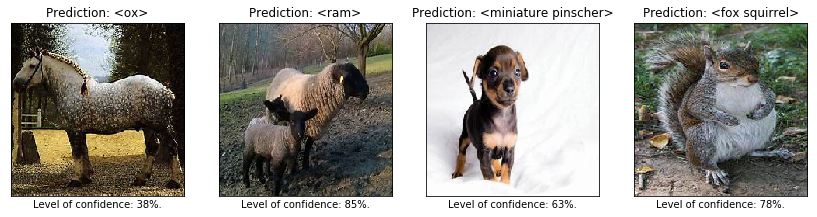

In [138]:
np.random.seed(42)
fig = plt.figure(figsize=(18, 18))
for i in range(1, 5):
    plt.subplot(1, 5, i)
    predict()

The ox is wrong here, because <horse> is not a category in ImageNet, the dataset on which this monstruous neural network was trained on. It's close enough.